In [1]:
import os
import pickle
import numpy as np
import tensorflow as tf

# Import project modules
from conllu_reader import ConlluReader
from algorithm import ArcEager, Transition, Sample
from conllu_token import Token
from model import ParserMLP

from DPUtils import plot_history

# Check for GPU availability (Optional)
print("TensorFlow Version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2025-12-05 14:46:15.841645: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-12-05 14:46:15.857258: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8473] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-12-05 14:46:15.861982: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1471] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-12-05 14:46:15.873658: I tensorflow/core/platform/cpu_feature_guard.cc:211] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorFlow Version: 2.17.0
Num GPUs Available:  1


I0000 00:00:1764945977.407063    2746 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1764945977.472498    2746 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1764945977.472534    2746 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [2]:
dataset_path = "dataset.pkl"

if not os.path.exists(dataset_path):
    print(f"Error: '{dataset_path}' not found. Please run main.py first to generate it.")
else:
    print(f"Loading dataset from {dataset_path}...")
    with open(dataset_path, "rb") as f:
        data = pickle.load(f)
        
    training_samples = data["training_samples"]
    dev_samples = data["dev_samples"]
    deprels = data["deprels"]
    actions = data["actions"]
    
    print("Dataset loaded successfully!")
    print(f"Training Samples: {len(training_samples)}")
    print(f"Development Samples: {len(dev_samples)}")
    print(f"Unique Dependency Labels: {len(deprels)}")

Loading dataset from dataset.pkl...
Dataset loaded successfully!
Training Samples: 81182
Development Samples: 4978
Unique Dependency Labels: 43


In [3]:
# Inspect the first training sample
sample = training_samples[80000]

print(f"--- Sample 1 ---")
# Note: Accessing internal state for visualization
print(f"State Stack: {[t.form for t in sample.state.S]}")
print(f"State Buffer (first 3): {[t.form for t in sample.state.B[:3]]}...")
print(f"Gold Transition: {sample.transition}")

--- Sample 1 ---
State Stack: ['ROOT', 'The']
State Buffer (first 3): ['revolution', 'in', 'the']...
Gold Transition: LEFT-ARC-det


In [4]:
# Extract features from the loaded sample
feats = sample.state_to_feats(nstack_feats=5, nbuffer_feats=5)

print("Feature List:", feats)

# Expected output format: 
# [Stack_Word_1, Stack_Word_0, Buffer_Word_0, Buffer_Word_1, 
#  Stack_UPOS_1, Stack_UPOS_0, Buffer_UPOS_0, Buffer_UPOS_1]

Feature List: ['The', 'ROOT', '<PAD>', '<PAD>', '<PAD>', 'revolution', 'in', 'the', 'arts', 'during', 'DET', 'ROOT_UPOS', '<PAD>', '<PAD>', '<PAD>', 'NOUN', 'ADP', 'DET', 'NOUN', 'ADP']


In [5]:
# Initialize Model
# You can adjust dimensions and epochs as needed
model = ParserMLP(word_emb_dim=200, hidden_dim=512, epochs=50, batch_size=64, learning_rate=0.0005)

print("Starting training...")
# The train function handles vocabulary building and vectorization internally
history = model.train(training_samples, dev_samples)

Starting training...
Building vocabulary...
Vocab built: 6872 words, 20 UPOS tags.
Detected Feature Shape: 4 words, 4 tags.
Vectorizing data...
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 words_input (InputLayer)    [(None, 4)]                  0         []                            
                                                                                                  
 upos_input (InputLayer)     [(None, 4)]                  0         []                            
                                                                                                  
 embedding (Embedding)       (None, 4, 200)               1374400   ['words_input[0][0]']         
                                                                                                  
 embedding_1 (Embedding)     (None, 4, 50)       

I0000 00:00:1764945978.873031    2746 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1764945978.873081    2746 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1764945978.873091    2746 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1764945979.031144    2746 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1764945979.031218    2746 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-12-05

Epoch 1/50


'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring f

   1/1269 [..............................] - ETA: 44:32 - loss: 4.2170 - action_output_loss: 1.3878 - deprel_output_loss: 3.7723 - action_output_accuracy: 0.2188 - deprel_output_accuracy: 0.0469

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


   5/1269 [..............................] - ETA: 1:51 - loss: 4.1743 - action_output_loss: 1.3739 - deprel_output_loss: 3.7339 - action_output_accuracy: 0.3438 - deprel_output_accuracy: 0.1625

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


   8/1269 [..............................] - ETA: 1:47 - loss: 4.1437 - action_output_loss: 1.3656 - deprel_output_loss: 3.7041 - action_output_accuracy: 0.3535 - deprel_output_accuracy: 0.2637

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


  10/1269 [..............................] - ETA: 1:49 - loss: 4.1238 - action_output_loss: 1.3611 - deprel_output_loss: 3.6836 - action_output_accuracy: 0.3531 - deprel_output_accuracy: 0.3031

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


  13/1269 [..............................] - ETA: 1:57 - loss: 4.0914 - action_output_loss: 1.3521 - deprel_output_loss: 3.6523 - action_output_accuracy: 0.3546 - deprel_output_accuracy: 0.3317

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


  17/1269 [..............................] - ETA: 1:45 - loss: 4.0384 - action_output_loss: 1.3417 - deprel_output_loss: 3.5956 - action_output_accuracy: 0.3557 - deprel_output_accuracy: 0.3631

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


  20/1269 [..............................] - ETA: 1:41 - loss: 3.9860 - action_output_loss: 1.3271 - deprel_output_loss: 3.5452 - action_output_accuracy: 0.3719 - deprel_output_accuracy: 0.3789

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


  31/1269 [..............................] - ETA: 1:16 - loss: 3.7271 - action_output_loss: 1.2828 - deprel_output_loss: 3.2590 - action_output_accuracy: 0.3901 - deprel_output_accuracy: 0.4189

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


  34/1269 [..............................] - ETA: 22:48 - loss: 3.6368 - action_output_loss: 1.2674 - deprel_output_loss: 3.1592 - action_output_accuracy: 0.4044 - deprel_output_accuracy: 0.4278

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring f

 531/1269 [===========>..................] - ETA: 57s - loss: 1.3482 - action_output_loss: 0.5321 - deprel_output_loss: 1.0881 - action_output_accuracy: 0.7896 - deprel_output_accuracy: 0.7156  

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring f

1149/1269 [==========================>...] - ETA: 4s - loss: 1.0253 - action_output_loss: 0.4314 - deprel_output_loss: 0.7920 - action_output_accuracy: 0.8313 - deprel_output_accuracy: 0.7759 

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


1269/1269 [==============================] - 15s 10ms/step - loss: 0.9922 - action_output_loss: 0.4203 - deprel_output_loss: 0.7626 - action_output_accuracy: 0.8359 - deprel_output_accuracy: 0.7820 - val_loss: 0.7520 - val_action_output_loss: 0.3631 - val_deprel_output_loss: 0.5185 - val_action_output_accuracy: 0.8688 - val_deprel_output_accuracy: 0.8345
Epoch 2/50
 105/1269 [=>............................] - ETA: 9s - loss: 0.5292 - action_output_loss: 0.2315 - deprel_output_loss: 0.3970 - action_output_accuracy: 0.9171 - deprel_output_accuracy: 0.8708

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 229/1269 [====>.........................] - ETA: 8s - loss: 0.5273 - action_output_loss: 0.2290 - deprel_output_loss: 0.3977 - action_output_accuracy: 0.9153 - deprel_output_accuracy: 0.8688

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 499/1269 [==========>...................] - ETA: 59s - loss: 0.5190 - action_output_loss: 0.2273 - deprel_output_loss: 0.3890 - action_output_accuracy: 0.9152 - deprel_output_accuracy: 0.8715

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


1128/1269 [=========================>....] - ETA: 5s - loss: 0.4953 - action_output_loss: 0.2223 - deprel_output_loss: 0.3640 - action_output_accuracy: 0.9176 - deprel_output_accuracy: 0.8794 

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


1269/1269 [==============================] - 10s 8ms/step - loss: 0.4912 - action_output_loss: 0.2205 - deprel_output_loss: 0.3610 - action_output_accuracy: 0.9184 - deprel_output_accuracy: 0.8806 - val_loss: 0.7715 - val_action_output_loss: 0.3914 - val_deprel_output_loss: 0.5069 - val_action_output_accuracy: 0.8686 - val_deprel_output_accuracy: 0.8437
Epoch 3/50
 485/1269 [==========>...................] - ETA: 1:02 - loss: 0.3131 - action_output_loss: 0.1305 - deprel_output_loss: 0.2434 - action_output_accuracy: 0.9547 - deprel_output_accuracy: 0.9225

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


1167/1269 [==========================>...] - ETA: 3s - loss: 0.3250 - action_output_loss: 0.1389 - deprel_output_loss: 0.2480 - action_output_accuracy: 0.9503 - deprel_output_accuracy: 0.9195  

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


1269/1269 [==============================] - 10s 8ms/step - loss: 0.3250 - action_output_loss: 0.1394 - deprel_output_loss: 0.2475 - action_output_accuracy: 0.9501 - deprel_output_accuracy: 0.9198 - val_loss: 0.8396 - val_action_output_loss: 0.4462 - val_deprel_output_loss: 0.5246 - val_action_output_accuracy: 0.8648 - val_deprel_output_accuracy: 0.8465


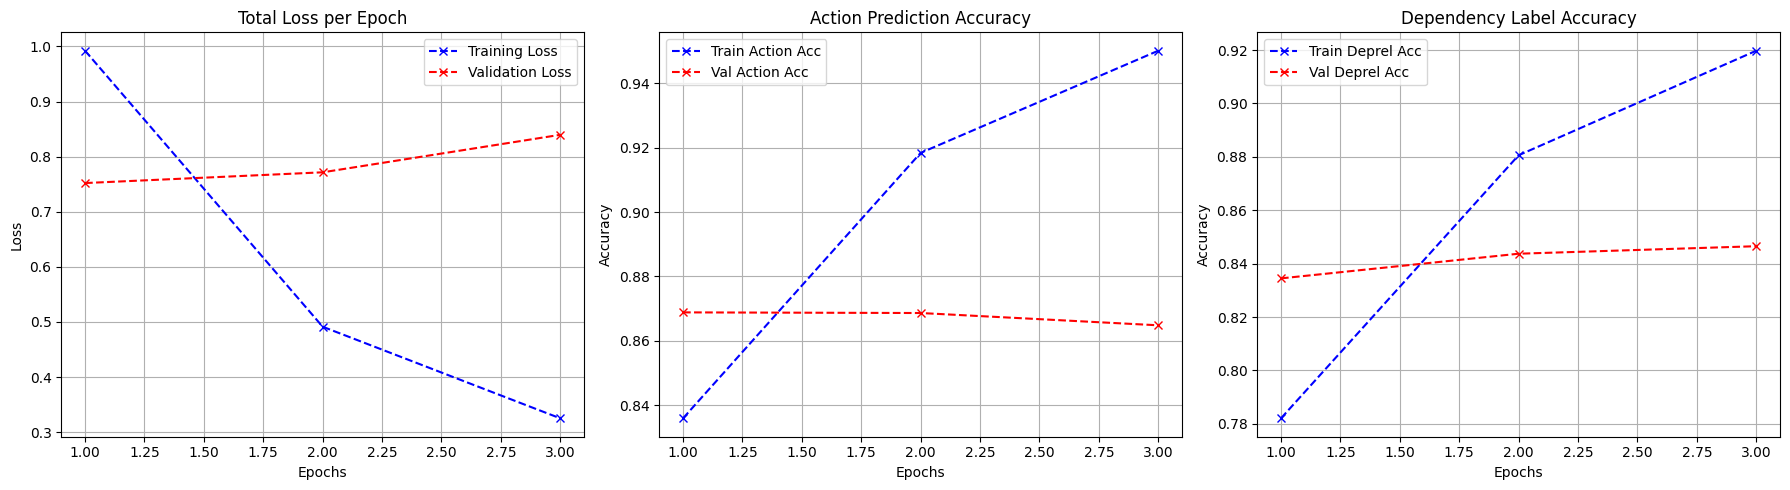

In [6]:
plot_history(history)

In [7]:
from conllu_reader import ConlluReader

# Initialize reader if not already done
reader = ConlluReader()

# Load the test set
# We use inference=True to ensure we treat this as unparsed data
print("Loading test set...")
test_trees = reader.read_conllu_file("en_partut-ud-test_clean.conllu", inference=True)
print(f"Loaded {len(test_trees)} sentences for testing.")

Loading test set...
Loaded 153 sentences for testing.


In [8]:
test_trees[1]

[0	ROOT	ROOT	ROOT_UPOS	ROOT_CPOS	ROOT_FEATS	_	_	_	_,
 1	Any	any	DET	DI	PronType=Ind	_	_	_	_,
 2	use	use	NOUN	S	Number=Sing	_	_	_	_,
 3	of	of	ADP	E	_	_	_	_	_,
 4	the	the	DET	RD	Definite=Def|PronType=Art	_	_	_	_,
 5	work	work	NOUN	S	Number=Sing	_	_	_	_,
 6	other	other	ADJ	A	Degree=Pos	_	_	_	_,
 7	than	than	SCONJ	CS	_	_	_	_	_,
 8	as	as	ADP	E	_	_	_	_	_,
 9	authorized	authorize	VERB	V	Tense=Past|VerbForm=Part	_	_	_	_,
 10	under	under	ADP	E	_	_	_	_	_,
 11	this	this	DET	DD	Number=Sing|PronType=Dem	_	_	_	_,
 12	license	license	NOUN	S	Number=Sing	_	_	_	_,
 13	or	or	CCONJ	CC	_	_	_	_	_,
 14	copyright	copyright	NOUN	S	Number=Sing	_	_	_	_,
 15	law	law	NOUN	S	Number=Sing	_	_	_	_,
 16	is	be	AUX	VA	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	_	_	_	_,
 17	prohibited	prohibit	VERB	V	Tense=Past|VerbForm=Part	_	_	_	_,
 18	.	.	PUNCT	FS	_	_	_	_	_]

In [9]:
# Conduct inference on the test set
print("Running inference on the test set...")
# The model.run method modifies the trees in-place or returns them
# It predicts the HEAD and DEPREL for each token
predicted_test_trees = model.run(test_trees)

print("Inference complete.")

Running inference on the test set...
Inference complete.


In [10]:
output_path = "output_five_feature_raw.conllu"

print(f"Saving raw predictions to {output_path}...")
reader.write_conllu_file(output_path, predicted_test_trees)
print("File saved.")

Saving raw predictions to output_five_feature_raw.conllu...
File saved.


In [11]:
from postprocessor import PostProcessor

post = PostProcessor()

print(f"Post-processing predictions in {output_path}...")

fixed_trees = post.postprocess(output_path)

final_output_path = "output_five_feature_fixed.conllu"
reader.write_conllu_file(final_output_path, fixed_trees)

print(f"Post-processing complete. Final predictions saved to {final_output_path}")

Post-processing predictions in output_five_feature_raw.conllu...
Post-processing complete. Final predictions saved to output_five_feature_fixed.conllu


In [12]:
# Run the evaluation script comparing the Gold Standard (test_clean) against your Fixed Output
# -v provides verbose output
!python conll18_ud_eval.py en_partut-ud-test_clean.conllu output_five_feature_fixed.conllu -v

Metric     | Precision |    Recall |  F1 Score | AligndAcc
-----------+-----------+-----------+-----------+-----------
Tokens     |    100.00 |    100.00 |    100.00 |
Sentences  |    100.00 |    100.00 |    100.00 |
Words      |    100.00 |    100.00 |    100.00 |
UPOS       |    100.00 |    100.00 |    100.00 |    100.00
XPOS       |    100.00 |    100.00 |    100.00 |    100.00
UFeats     |    100.00 |    100.00 |    100.00 |    100.00
AllTags    |    100.00 |    100.00 |    100.00 |    100.00
Lemmas     |    100.00 |    100.00 |    100.00 |    100.00
UAS        |     77.52 |     77.52 |     77.52 |     77.52
LAS        |     67.72 |     67.72 |     67.72 |     67.72
CLAS       |     53.27 |     53.00 |     53.14 |     53.00
MLAS       |     51.69 |     51.43 |     51.56 |     51.43
BLEX       |     53.27 |     53.00 |     53.14 |     53.00
